In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn import over_sampling

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, make_scorer, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report


In [ ]:
df = pd.read_excel("C:\\Users\\user\\Downloads\\E Commerce Dataset.xlsx", sheet_name=1)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


this code reads the second sheet of an Excel file into a pandas DataFrame and then displays the first few rows of that DataFrame.

In [ ]:
df_dict = pd.read_excel("C:\\Users\\user\\Downloads\\E Commerce Dataset.xlsx", sheet_name=0)
df_dict.columns = df_dict.iloc[0]
df_dict = df_dict[1:].reset_index()
df_dict[['Variable','Discerption']]

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


this code reads data from the first sheet of the Excel file, sets the column names, removes the first row (which contained column descriptions), and then selects only the 'Variable' and 'Discerption' columns, presumably for further analysis or display.

# 1. EDA

In [ ]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')

    # Initialize a summary DataFrame
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()

    # Select only numeric columns for these calculations
    numeric_df = df.select_dtypes(include=['number'])

    summ['median'] = numeric_df.median()
    summ['mean'] = numeric_df.mean()
    summ['std'] = numeric_df.std()
    summ['max'] = numeric_df.max()

    return summ


In [ ]:
summary('data',df)

data shape: (5630, 20)


,dtypes,null,unique,min,median,mean,std,max
CustomerID,int64,0,5630,50001,52815.50,52815.500000,1625.385339,55630.00
Churn,int64,0,2,0,0.00,0.168384,0.374240,1.00
Tenure,float64,264,36,0.0,9.00,10.189899,8.557241,61.00
PreferredLoginDevice,object,0,3,Computer,NaN,NaN,NaN,NaN
CityTier,int64,0,3,1,1.00,1.654707,0.915389,3.00
WarehouseToHome,float64,251,34,5.0,14.00,15.639896,8.531475,127.00
PreferredPaymentMode,object,0,7,CC,NaN,NaN,NaN,NaN
Gender,object,0,2,Female,NaN,NaN,NaN,NaN
HourSpendOnApp,float64,255,6,0.0,3.00,2.931535,0.721926,5.00
NumberOfDeviceRegistered,int64,0,6,1,4.00,3.688988,1.023999,6.00


function returns the summ DataFrame containing the summary statistics for the input DataFrame df.

In [ ]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(['Phone'], ['Mobile Phone'])
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Mobile'], ['Mobile Phone'])
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['Cash on Delivery'], ['COD'])
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['Credit Card'], ['CC'])

In [ ]:
cats= ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
ordinal = ['CityTier', 'SatisfactionScore']
binary = ['Churn', 'Complain']
nums = df.loc[:, ~df.columns.isin(cats + binary + ordinal)].columns[1:]

These are lists containing column names grouped into different categories based on their characteristics.
cats contains the names of categorical variables.
ordinal contains the names of ordinal variables.
binary contains the names of binary variables.

In [ ]:
df[cats].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,2,Mobile Phone,3996
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile Phone,2080
MaritalStatus,5630,3,Married,2986


generates and displays descriptive statistics for the categorical variables in the DataFrame df, with each variable name displayed as a row and the statistics displayed as columns.

In [ ]:
for col in cats:
    vc = df[col].value_counts().rename_axis(col).reset_index(name='Counts')
    display(vc)

,PreferredLoginDevice,Counts
0,Mobile Phone,3996
1,Computer,1634


,PreferredPaymentMode,Counts
0,Debit Card,2314
1,CC,1774
2,E wallet,614
3,COD,514
4,UPI,414


,Gender,Counts
0,Male,3384
1,Female,2246


,PreferedOrderCat,Counts
0,Mobile Phone,2080
1,Laptop & Accessory,2050
2,Fashion,826
3,Grocery,410
4,Others,264


,MaritalStatus,Counts
0,Married,2986
1,Single,1796
2,Divorced,848


this code iterates over each categorical variable, calculates the value counts for each category within that variable, and displays the counts in a tabular format.

# Univariate Analysis

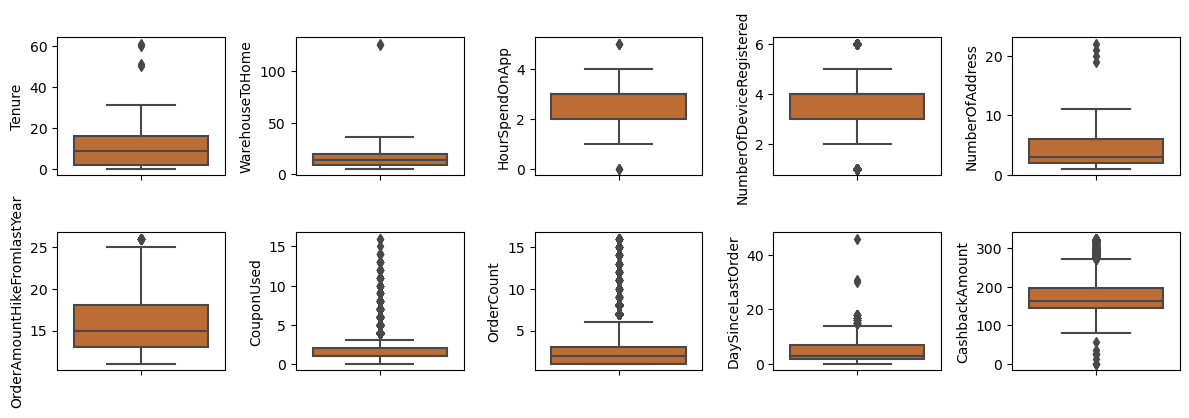

In [ ]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='chocolate')
    plt.tight_layout()

this code creates a figure with multiple subplots, each containing a boxplot for a numerical variable from the DataFrame df and there are quite a lot of outliers in almost all of the variables.

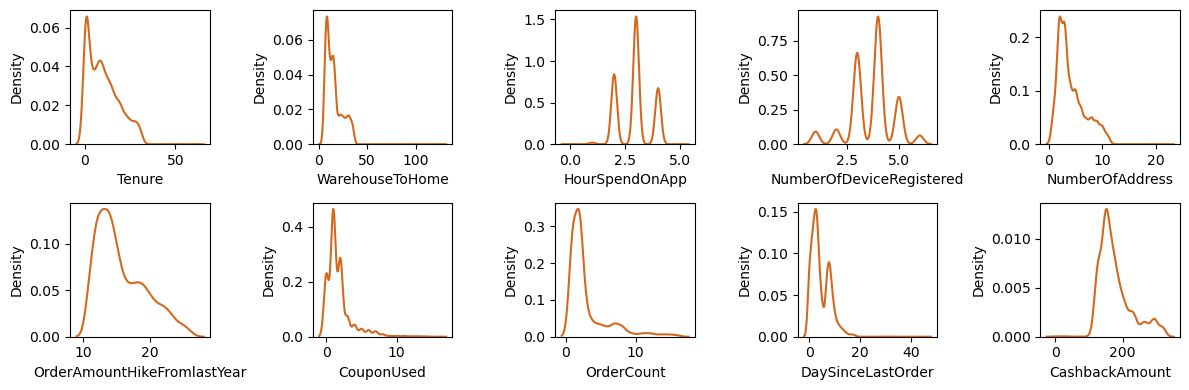

In [ ]:
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(x=df[nums[i]], color='chocolate')
    plt.tight_layout()

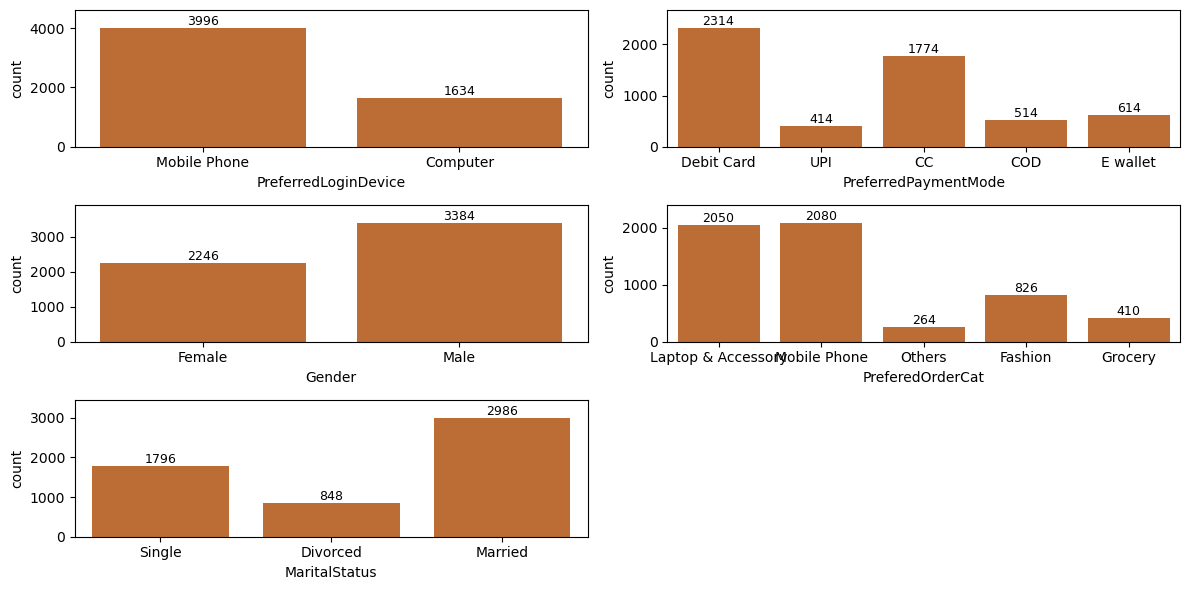

In [ ]:
plt.figure(figsize=(12,6))
for i in range(0, len(cats)):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(x=df[cats[i]], color='chocolate')
    plt.tight_layout()
    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.f')
        ax.set_ylim(top = ax.get_ylim()[1]*1.1)

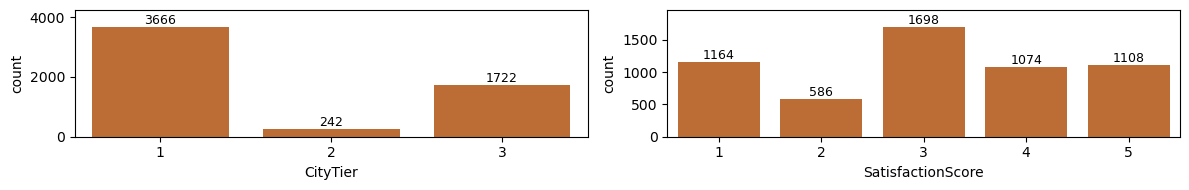

In [ ]:
plt.figure(figsize=(12,2))
for i in range(0, len(ordinal)):
    plt.subplot(1, 2, i+1)
    ax = sns.countplot(x=df[ordinal[i]], color='chocolate')
    plt.tight_layout()
    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.f')
        ax.set_ylim(top = ax.get_ylim()[1]*1.1)

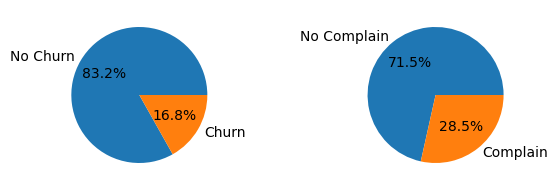

In [ ]:
plt.figure(figsize=(12,2))
cats_bin = cats[4:]
for i in range(0, len(binary)):
    plt.subplot(1,4,i+1)
    data=df[binary[i]].value_counts()
    labels = [f'No {binary[i]}', f'{binary[i]}']
    plt.pie(data,labels=labels,autopct='%.1f%%')
    plt.tight_layout()

# Multivariate Analysis

<AxesSubplot:>

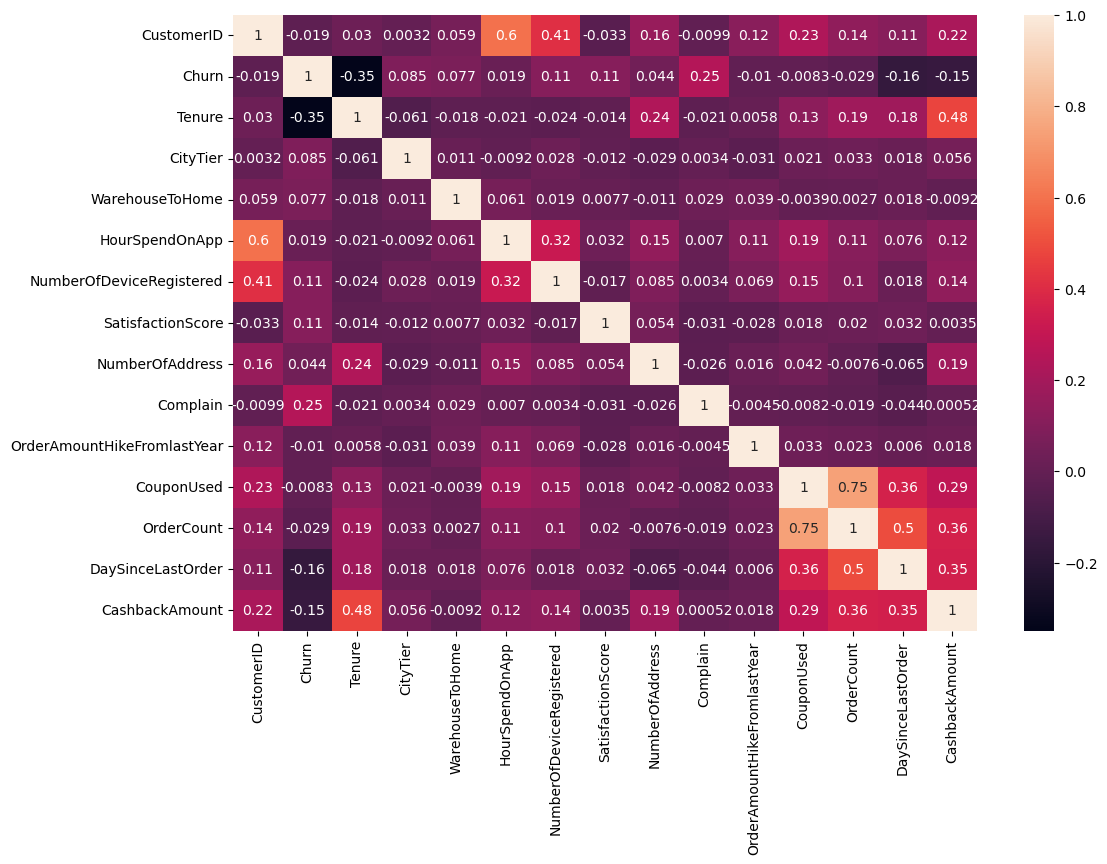

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

Positive Correlation:

*HoursOnApp and CustomerID have a correlation of 0.6, suggesting that customers with higher IDs (probably newer clients) spend more time on the app.
*CouponUsed and OrderCount have a correlation of 0.75, indicating that more coupons are used by customers with a higher number of orders. It suggests that promotions and discounts are effective in increasing purchase frequency.

Negative Correlation:

*Churn and Tenure have a correlation of -0.35, indicating that customers with longer tenure are less likely to churn, implying that efforts to keep customers engaged over time could reduce customer turnover.

Many variables show little to no correlation with each other, meaning that there may be no linear relationship or that any relationship is complex and not easily captured by correlation alone. This is an indication that customer retention strategies need to be multifaceted. While promotions may drive sales, they do not necessarily build long-term loyalty.
At this point in the analysis, the information obtained by the relationship between the numerical variables seems to indicate that it would be beneficial to focus on personalized engagement strategies that increase tenure, as well as to re-evaluate the cashback incentive programs to ensure they are contributing positively to long-term customer loyalty.


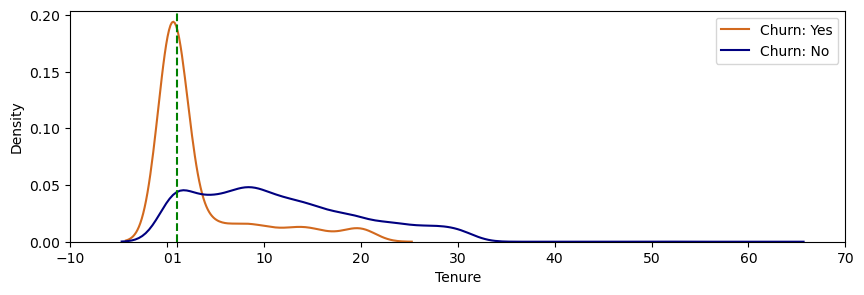

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'chocolate', label= 'Churn: Yes', ax=ax)
sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
plt.axvline(x=1, ls='--', color='green')
x_ticks = np.append(ax.get_xticks(), 1)
ax.set_xticks(x_ticks)
plt.legend(loc = 1)

Customers with longer tenure seem less likely to churn. Makes sense as longer tenure indicates satisfaction.

In [ ]:
def churn_plot(x, data):
    df_cats = data.copy()
    df_city = df_cats.groupby(x)['CustomerID'].nunique().reset_index(name='Total')
    df_churn =  df_cats.groupby([x, 'Churn'])['CustomerID'].nunique().reset_index(name='TotalCustomer')
    df_merge = df_churn.merge(df_city, on=x)
    df_merge['Percentage'] = round(df_merge['TotalCustomer']/df_merge['Total']*100,2)

    return df_merge

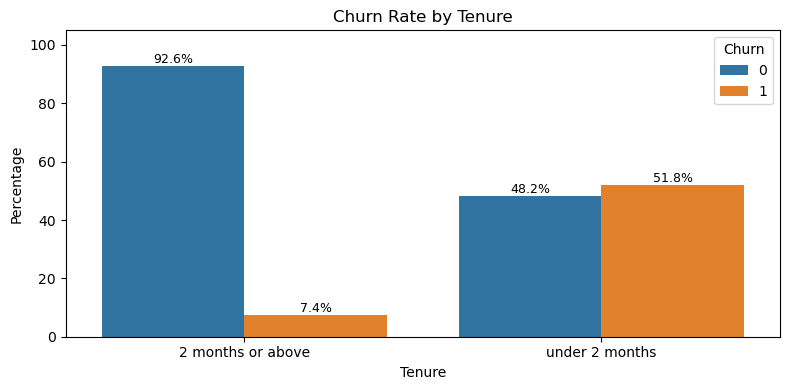

In [ ]:
def segment(df):
    if df['Tenure'] < 2:
        return 'under 2 months'
    else:
        return '2 months or above'

df_tenure = df.copy()
df_tenure['Tenure'] = df_tenure.apply(lambda x: segment(x), axis=1)

plt.figure(figsize=(8,4))
data = churn_plot('Tenure', df_tenure)
ax = sns.barplot(x='Tenure', y='Percentage', data=data, hue = 'Churn')
ax.set_title('Churn Rate by Tenure')

for container in ax.containers:
    ax.bar_label(container, fontsize=9, fmt='%.1f%%')
    ax.set_ylim(top=105)
    ax.legend(loc=1, title='Churn')
plt.tight_layout()

Customers with longer tenure seem less likely to churn. Makes sense as longer tenure indicates satisfaction.

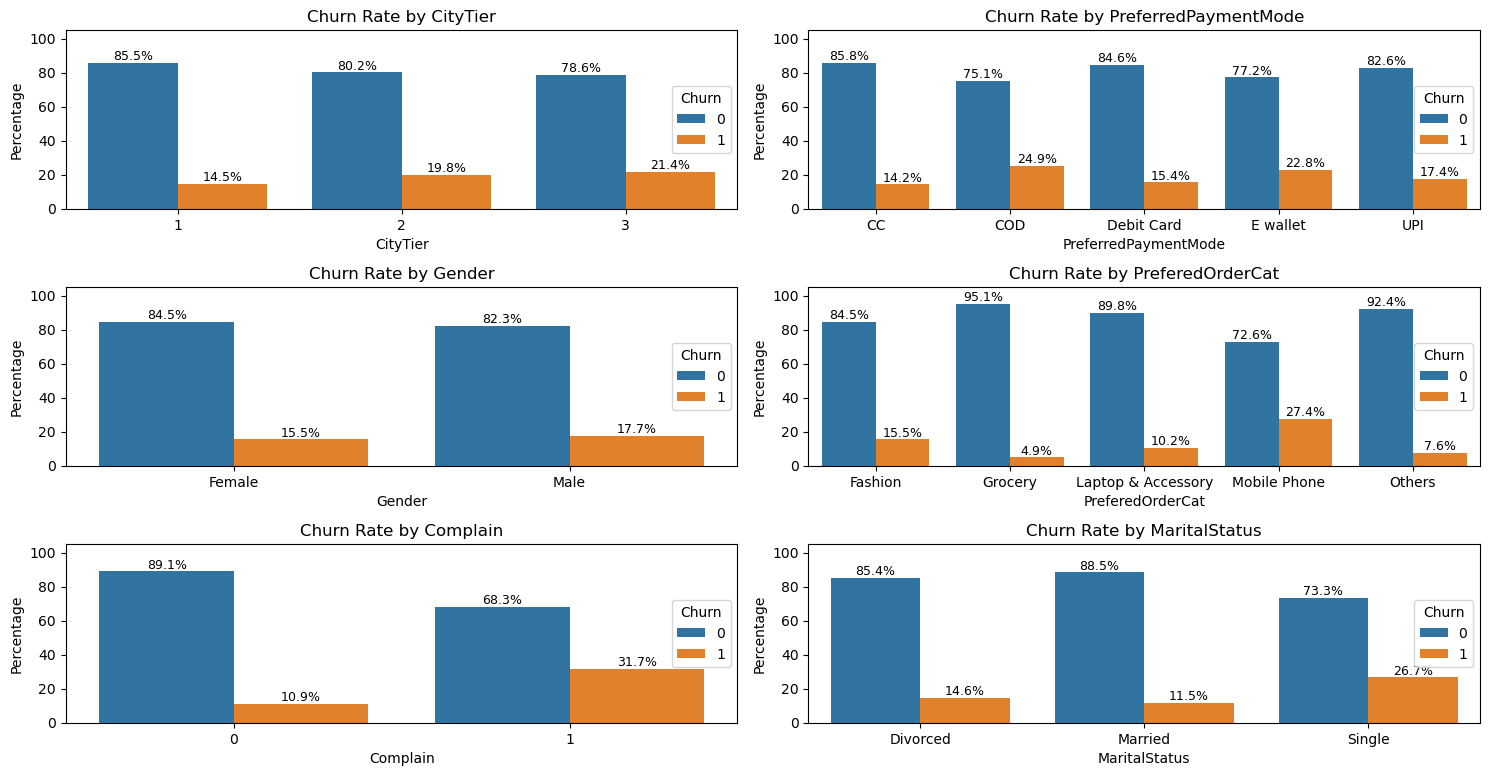

In [ ]:
columns = ['CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'Complain', 'MaritalStatus']
plt.figure(figsize=(15,10))
for i in range(0, len(columns)):
    plt.subplot(4, 2, i+1)
    data = churn_plot(columns[i], df)
    ax = sns.barplot(x=columns[i], y='Percentage', data=data, hue = 'Churn')
    ax.set_title(f'Churn Rate by {columns[i]}')

    for container in ax.containers:
        ax.bar_label(container, fontsize=9, fmt='%.1f%%')
        ax.set_ylim(top=105)
        ax.legend(loc='center right', title='Churn')
    plt.tight_layout()

Churn Rate by CityTier: The churn rate appears to be higher for lower tiered cities. This could be due to a number of factors, such as lower income levels in lower tiered cities, or a lack of familiarity with e-commerce.

Churn Rate by Preferred PaymentMode: The churn rate appears to be higher for customers who prefer Cash on Delivery (COD) and E-wallet. This could be because these payment methods are less convenient than credit cards or debit cards, or because they are associated with fraud. It is also possible that customers who use COD or E-wallet are less familiar with e-commerce and are therefore more likely to churn.

Churn Rate by Gender: The churn rate is slightly higher for male customers than for female customers.

Churn Rate by PreferedOrderCat:  The churn rate is highest for customers who prefer the "Mobile Phone" category and lowest for customers who prefer "Grocery". This suggests that customers who primarily purchase mobile phones are more likely to churn than customers who purchase a wider variety of products.

Churn Rate by Complain:  The churn rate is much higher for customers who have complained than for customers who have not complained. This suggests that customer satisfaction is a major factor in churn rate.

Churn Rate by MaritalStatus:  The churn rate is highest for single customers (26.7%) and lowest for married customers (11.5%). This could be due to a number of factors, such as financial instability or changes in lifestyle of customers.

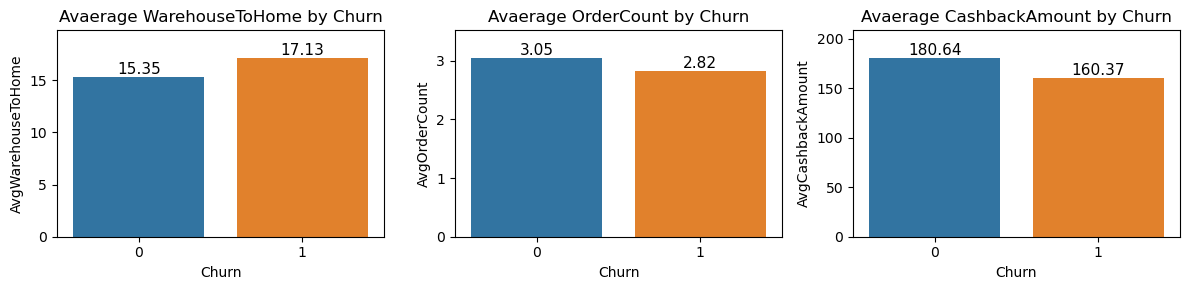

In [ ]:
columns = ['WarehouseToHome', 'OrderCount', 'CashbackAmount']
plt.figure(figsize=(12,3))
for i in range(0, len(columns)):
    plt.subplot(1, 3, i+1)
    data = df.copy()
    data = data.groupby('Churn')[columns[i]].mean().reset_index(name='Avg'+ columns[i])
    ax = sns.barplot(x='Churn', y='Avg'+columns[i], data=data)

    for container in ax.containers:
        ax.bar_label(container, fontsize=11, fmt='%.2f')
        ax.set_ylim(top=ax.get_ylim()[1]*1.1)
        ax.set_title(f'Avaerage {columns[i]} by Churn')
    plt.tight_layout()

Warehouse Distance: Customers who churned tend to live further away from warehouses on average than those who did not churn. This could be because it takes longer for them to receive their orders, leading to frustration and a lower likelihood of reordering.

Order Count: Customers who churned tend to have a lower average order count than those who did not churn. This could be because they are less engaged with the company and less likely to make repeat purchases.

# 2. Preprocessing

# Missing Values

In [ ]:
print('Skewness of Tenure :',df['Tenure'].skew())
print('Skewness of WarehouseToHome :',df['WarehouseToHome'].skew())
print('Skewness of HourSpendOnApp :',df['HourSpendOnApp'].skew())
print('Skewness of OrderAmountHikeFromlastYear :',df['OrderAmountHikeFromlastYear'].skew())
print('Skewness of CouponUsed :',df['CouponUsed'].skew())
print('Skewness of OrderCount :',df['OrderCount'].skew())
print('Skewness of DaySinceLastOrder :',df['DaySinceLastOrder'].skew())
print('Skewness of CashbackAmount :',df['CashbackAmount'].skew())

Skewness of Tenure : 0.7365133838993447
Skewness of WarehouseToHome : 1.619153668208649
Skewness of HourSpendOnApp : -0.0272126216339304
Skewness of OrderAmountHikeFromlastYear : 0.7907853590510951
Skewness of CouponUsed : 2.545652562076972
Skewness of OrderCount : 2.196414108096659
Skewness of DaySinceLastOrder : 1.1909995034566865
Skewness of CashbackAmount : 1.1498457194574931


* If the skewness value < -1 or > +1 -- Highly skewed distribution
* If the skewness value is between -1 & -1/2 or between +1/2 & +1 -- Moderately skewed distribution
* If the skewness value between -1/2 & +1/2 -- Approximately symmetric distribution
------------------------------------------------------------------------------------------------------
* In highly skewed distribution and moderately skewed distribution, median is used to handle null values.
* In approximately symmetric distribution, mean is used to handle null values.
* If the values are categorical, mode is used to handle the null values.

Highly skewed distribution: WarehouseToHome, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount

Moderately skewed distribution: Tenure, OrderAmountHikeFromlastYear

Approximately symmetric distribution: HourSpendOnApp

In [ ]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mean(), inplace=True)

The code aims to handle missing values for several numerical columns in the DataFrame df by replacing these missing values with the median of the respective columns. Using the median is a common technique because it is less affected by outliers compared to the mean, thus providing a more robust central tendency measure for filling missing data. This helps to maintain the integrity of the dataset for further analysis or modeling.

# Outliers

In [ ]:
print(f'before: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]

print(f'after: {len(df)}')

before: 5630
after: 5350


The code aims to clean the DataFrame df by removing rows that contain outliers in any of the numerical columns specified in the nums list. This is done by calculating the z-score for each numerical column and filtering out rows where the z-score is 3 or higher. This helps ensure that the data used for further analysis or modeling is free from extreme outliers, which can skew results.

# Duplicated Data

In [ ]:
df.duplicated(subset=['CustomerID']).sum()

0

The code calculates and returns the number of duplicate rows in the DataFrame df that have the same 'CustomerID'. This is useful for data cleaning and ensuring that there are no unintended duplicate entries in the dataset.

# Feature Encoding

# Label Encoding

In [ ]:
df['Gender'] = df['Gender'].replace(['Female','Male'], [0, 1])

The purpose of this code is to convert categorical variables into numerical format, which is often required for machine learning algorithms and statistical analysis.
By transforming 'Gender' into 0s and 1s, and simplifying 'MaritalStatus' to binary values, the data is prepped for further numerical analysis or for feeding into models that require numerical input.

# One Hot Encoding

In [ ]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(['Mobile Phone'], ['Handphone'])
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace(['CC','COD'], ['Credit Card','Cash on Delivery'])
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace(['Mobile Phone', 'Laptop & Accessory'], ['Electronics', 'Electronics'])

The purpose of this code is to standardize and simplify the categories within certain columns. This can help in reducing the number of unique values, making the data easier to analyze and interpret.
By grouping similar items together, the code ensures consistency in categorical values, which is particularly useful for downstream analysis, visualization, or machine learning tasks.

In [ ]:
df = pd.get_dummies(df, columns=['MaritalStatus'], prefix='Marital')

In [ ]:
df = pd.get_dummies(df)
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredLoginDevice_Handphone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Electronics,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others
0,50001,1,4.0,3,6.0,0,3.000000,3,2,9,...,1,0,0,1,0,0,1,0,0,0
1,50002,1,9.0,1,8.0,1,3.000000,4,3,7,...,1,0,0,0,0,1,1,0,0,0
2,50003,1,9.0,1,30.0,1,2.000000,4,3,6,...,1,0,0,1,0,0,1,0,0,0
3,50004,1,0.0,3,15.0,1,2.000000,4,5,8,...,1,0,0,1,0,0,1,0,0,0
4,50005,1,0.0,1,12.0,1,2.931535,3,5,3,...,1,0,1,0,0,0,1,0,0,0


# Feature Engineering

In [ ]:
df['AvgCashback'] = df['CashbackAmount'] / df['OrderCount']

The calculation of average cashback per order provides a more standardized measure that can be useful for analysis and decision-making processes in the context of customer transactions and incentives.

# Feature Transformation

In [ ]:
column = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
          'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
          'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'AvgCashback']
for col in column:
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(len(df),1))

In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Electronics,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,AvgCashback
count,5350.000000,5350.000000,5.350000e+03,5.350000e+03,5.350000e+03,5350.000000,5.350000e+03,5.350000e+03,5.350000e+03,5.350000e+03,...,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5350.000000,5.350000e+03
mean,52802.826168,0.170467,1.908287e-16,-1.718252e-17,-1.949271e-16,0.600748,1.855120e-14,1.253191e-14,-2.521438e-16,-1.206205e-15,...,0.091402,0.315140,0.410280,0.108224,0.074953,0.757570,0.140561,0.062056,0.039813,-3.555826e-17
std,1627.280475,0.376078,1.000093e+00,1.000093e+00,1.000093e+00,0.489791,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,...,0.288207,0.464615,0.491931,0.310693,0.263341,0.428593,0.347600,0.241280,0.195538,1.000093e+00
min,50001.000000,0.000000,-1.198863e+00,-7.143355e-01,-1.307003e+00,0.000000,-2.745469e+00,-2.607447e+00,-1.491615e+00,-1.256326e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.821970e+00
25%,51394.250000,0.000000,-9.542994e-01,-7.143355e-01,-8.110482e-01,0.000000,-1.320368e+00,-6.580561e-01,-7.662794e-01,-8.632882e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-6.757828e-01
50%,52784.500000,0.000000,-9.832813e-02,-7.143355e-01,-1.911048e-01,1.000000,1.047343e-01,3.166394e-01,-4.094416e-02,-4.702500e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.799765e-01
75%,54208.750000,0.000000,6.353615e-01,1.474493e+00,5.528273e-01,1.000000,1.047343e-01,3.166394e-01,6.843911e-01,7.088646e-01,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.055236e-01
max,55630.000000,1.000000,2.591867e+00,1.474493e+00,2.536646e+00,1.000000,2.954938e+00,2.266030e+00,1.409726e+00,2.674056e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.849208e+00


StandardScaler standardizes features by removing the mean and scaling to unit variance. This ensures that each feature has a mean of 0 and a standard deviation of 1 after standardization.
It is important to standardize features before applying many machine learning algorithms to ensure that features are on a similar scale and have equal influence on the model.

# Feature Selection

<AxesSubplot:>

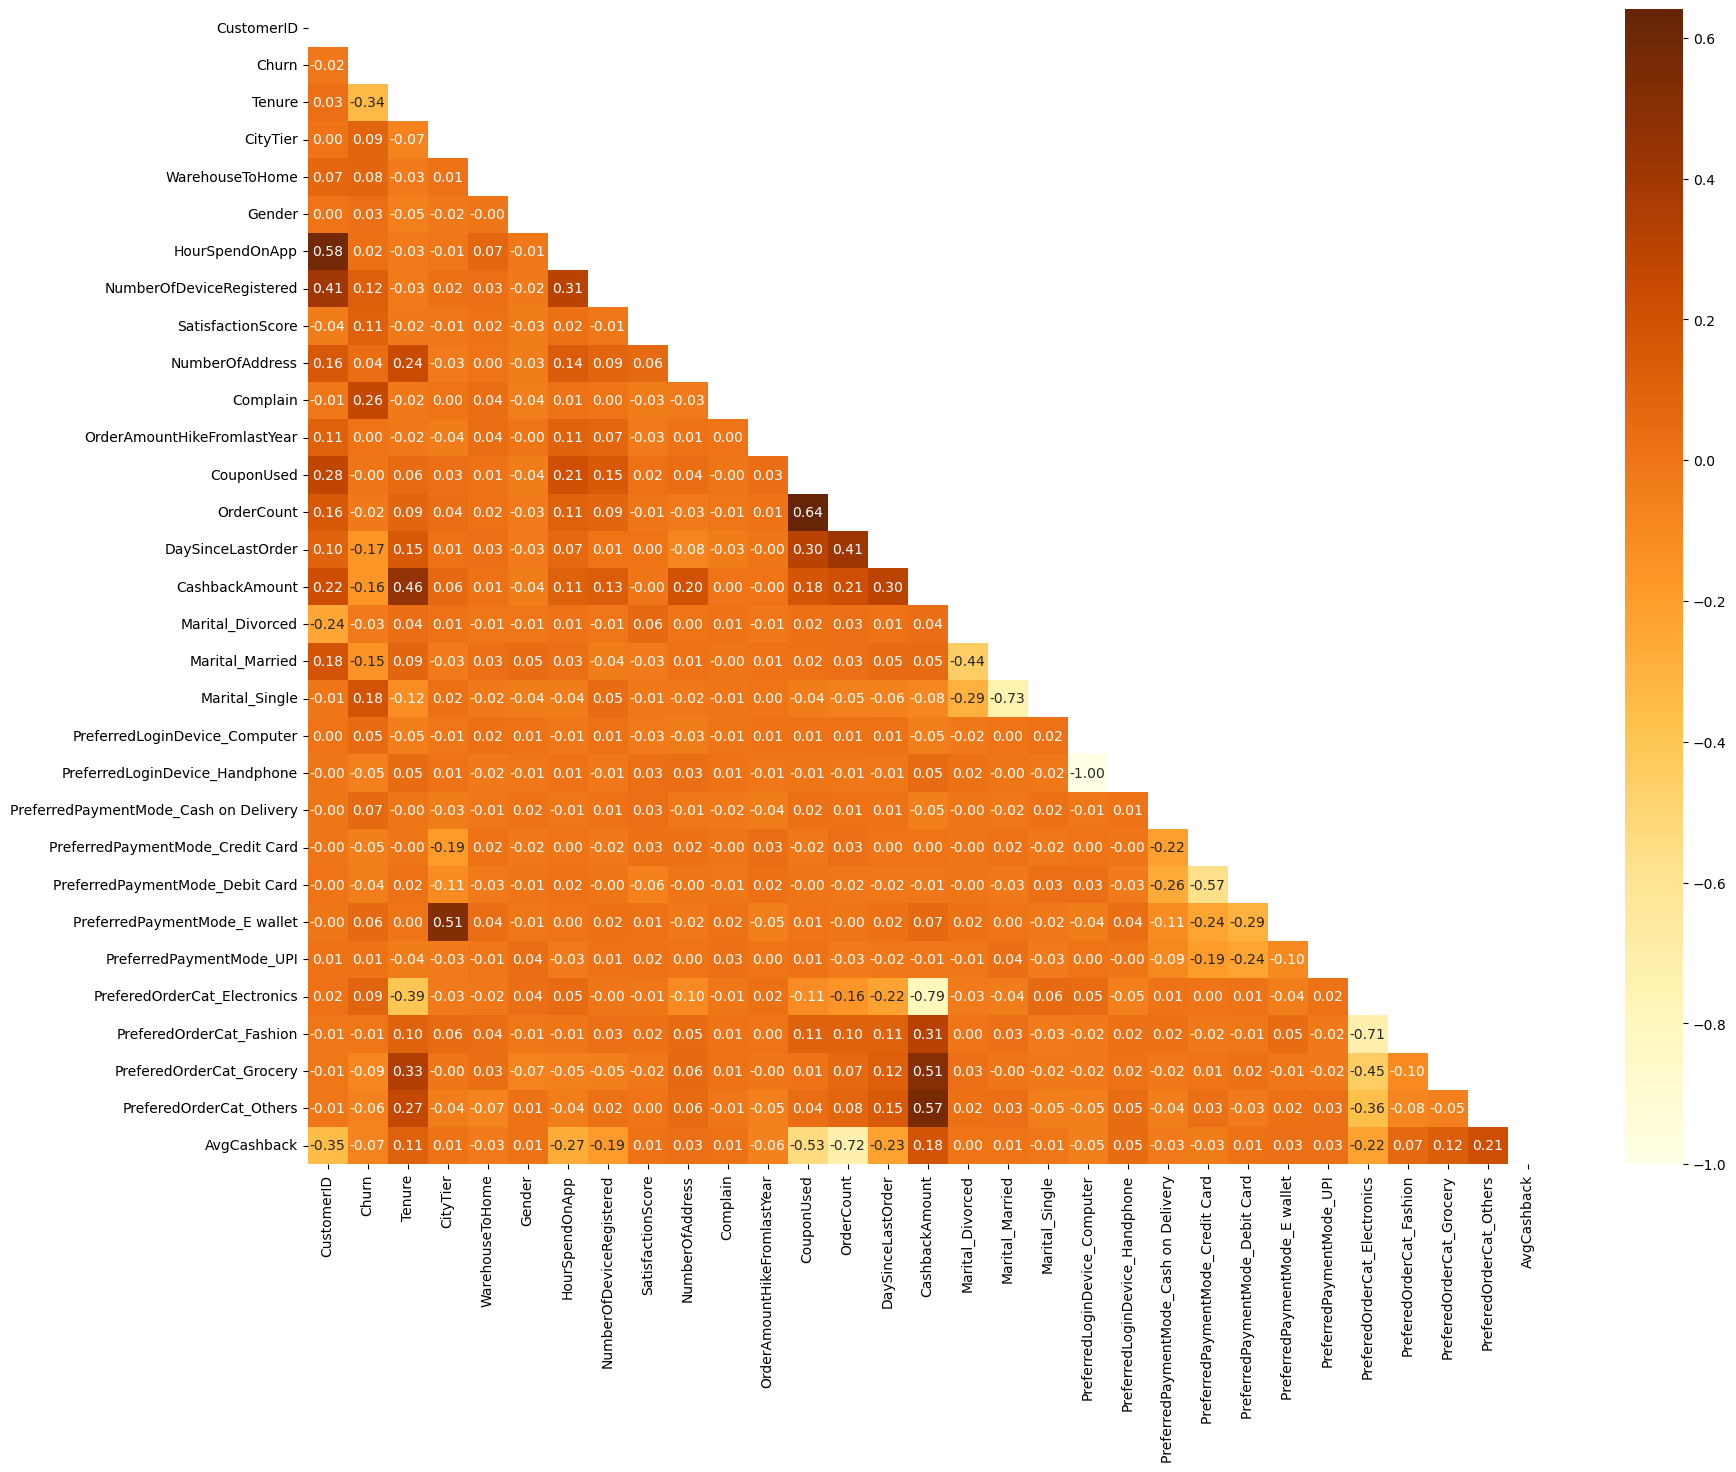

In [ ]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f', cmap='YlOrBr')

In [ ]:
column = []
for col in df.columns:
    if (abs(df['Churn'].corr(df[col])) > 0.05):
        column.append(col)
df_final = df[column]
df_final.sample(3)

,Churn,Tenure,CityTier,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,Complain,DaySinceLastOrder,CashbackAmount,Marital_Married,Marital_Single,PreferredLoginDevice_Computer,PreferredLoginDevice_Handphone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_E wallet,PreferedOrderCat_Electronics,PreferedOrderCat_Grocery,PreferedOrderCat_Others,AvgCashback
3355,0,1.369051,1.474493,-0.811048,1.291335,-0.766279,1,-0.376740,-0.357648,0,1,0,1,0,0,1,0,0,-0.380311
3254,0,1.124488,1.474493,-0.811048,2.266030,-0.040944,0,-0.682545,0.359804,0,1,0,1,1,0,1,0,0,-0.980017
467,0,1.246770,-0.714335,-0.935037,-0.658056,-0.766279,1,-1.294154,1.997606,0,0,0,1,0,0,0,1,0,-0.183812


The purpose of this code is to select features from the DataFrame df that have a significant correlation (absolute correlation greater than 0.05) with the target variable 'Churn'.
By filtering features based on their correlation with the target variable, the code aims to identify potential predictors of churn that may be useful for building predictive models or performing further analysis.

# Train Test Split Data

In [ ]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [ ]:
# Replace whitespaces in feature names with underscores
X.columns = [col.replace(' ', '_') for col in X.columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Handle Class Imbalance

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(4280, 18)
(4280,)
0    3526
1     754
Name: Churn, dtype: int64


X_train has 4280 samples, each with 18 features.

y_train contains 4280 labels corresponding to the 4280 samples in X_train.

0: 3526: There are 3526 samples labeled as 0, which could represent customers who did not churn.
1: 754: There are 754 samples labeled as 1, which could represent customers who did churn.

In [ ]:
X_train, y_train = over_sampling.SMOTE(random_state=10).fit_resample(X_train, y_train)

After oversampling, the training data will have balanced class distributions, which can help improve the performance of machine learning models, especially in scenarios where one class is underrepresented.

By generating synthetic samples for the minority class, SMOTE aims to balance the class distribution, which can lead to more robust and accurate models, especially for classification tasks.

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(7052, 18)
(7052,)
0    3526
1    3526
Name: Churn, dtype: int64


the oversampling process was successful and that the class distribution is now balanced. Balanced class distribution is essential for training classifiers, as it helps prevent models from being biased towards the majority class.

# 3. Modeling

Logistic Regression model

In [ ]:
# Initializing and training the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.8074766355140187
Confusion Matrix:
[[729 183]
 [ 23 135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       912
           1       0.42      0.85      0.57       158

    accuracy                           0.81      1070
   macro avg       0.70      0.83      0.72      1070
weighted avg       0.89      0.81      0.83      1070

Cross-validation scores: [0.78242381 0.80864635 0.81985816 0.8035461  0.81276596]
Mean CV accuracy: 0.8054480751541837


Decision Tree model

In [ ]:
# Initializing and training the Decision Tree model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Making predictions
y_pred = dt_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.9345794392523364
Confusion Matrix:
[[865  47]
 [ 23 135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       912
           1       0.74      0.85      0.79       158

    accuracy                           0.93      1070
   macro avg       0.86      0.90      0.88      1070
weighted avg       0.94      0.93      0.94      1070

Cross-validation scores: [0.88731396 0.94684621 0.93120567 0.93262411 0.94893617]
Mean CV accuracy: 0.9293852255077883


Random Forest model

In [ ]:
# Initializing and training the Random Forest model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.9598130841121495
Confusion Matrix:
[[884  28]
 [ 15 143]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       912
           1       0.84      0.91      0.87       158

    accuracy                           0.96      1070
   macro avg       0.91      0.94      0.92      1070
weighted avg       0.96      0.96      0.96      1070

Cross-validation scores: [0.94897236 0.97094259 0.97730496 0.97659574 0.97304965]
Mean CV accuracy: 0.9693730617086619


SVM model

In [ ]:
# Initializing and training the SVM model
svm_classifier = SVC(kernel='linear')  # can choose other kernels such as 'rbf', 'poly', etc.
svm_classifier.fit(X_train, y_train)

# Making predictions
y_pred = svm_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.814018691588785
Confusion Matrix:
[[737 175]
 [ 24 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       912
           1       0.43      0.85      0.57       158

    accuracy                           0.81      1070
   macro avg       0.70      0.83      0.73      1070
weighted avg       0.89      0.81      0.84      1070

Cross-validation scores: [0.7859674  0.8065202  0.8177305  0.80992908 0.81914894]
Mean CV accuracy: 0.8078592216173831


KNN model

In [ ]:
# Initializing and training the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # can choose the number of neighbors
knn_classifier.fit(X_train, y_train)

# Making predictions
y_pred = knn_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Accuracy: 0.8719626168224299
Confusion Matrix:
[[785 127]
 [ 10 148]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       912
           1       0.54      0.94      0.68       158

    accuracy                           0.87      1070
   macro avg       0.76      0.90      0.80      1070
weighted avg       0.92      0.87      0.88      1070

Cross-validation scores: [0.91849752 0.93054571 0.91560284 0.9141844  0.89078014]
Mean CV accuracy: 0.9139221215274113


Gradient Boosting model

In [ ]:
# Initializing and training the Gradient Boosting model
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = gb_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Cross-validation for better model assessment
cross_val_scores = cross_val_score(gb_classifier, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", cross_val_scores.mean())

Accuracy: 0.8943925233644859
Confusion Matrix:
[[826  86]
 [ 27 131]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       912
           1       0.60      0.83      0.70       158

    accuracy                           0.89      1070
   macro avg       0.79      0.87      0.82      1070
weighted avg       0.91      0.89      0.90      1070

Cross-validation scores: [0.91214953 0.91308411 0.90280374 0.90747664 0.91401869]
Average cross-validation score: 0.9099065420560748


Naive Bayes model

In [ ]:
# Initializing and training the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Making predictions
y_pred = nb_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Cross-validation for better model assessment
cross_val_scores = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", cross_val_scores.mean())

Accuracy: 0.47757009345794393
Confusion Matrix:
[[373 539]
 [ 20 138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.41      0.57       912
           1       0.20      0.87      0.33       158

    accuracy                           0.48      1070
   macro avg       0.58      0.64      0.45      1070
weighted avg       0.84      0.48      0.54      1070

Cross-validation scores: [0.69065421 0.7682243  0.70373832 0.69626168 0.71962617]
Average cross-validation score: 0.7157009345794393


Neural Network model

In [ ]:
# Initializing and training the Neural Network model
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, learning_rate_init=0.01, random_state=42)
nn_classifier.fit(X_train, y_train)

# Making predictions
y_pred = nn_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Cross-validation for better model assessment
cross_val_scores = cross_val_score(nn_classifier, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", cross_val_scores.mean())

Accuracy: 0.9429906542056075
Confusion Matrix:
[[865  47]
 [ 14 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       912
           1       0.75      0.91      0.83       158

    accuracy                           0.94      1070
   macro avg       0.87      0.93      0.90      1070
weighted avg       0.95      0.94      0.95      1070

Cross-validation scores: [0.97102804 0.98037383 0.97009346 0.97476636 0.97383178]
Average cross-validation score: 0.9740186915887851


LightGBM Model

In [ ]:
# Initialize the LightGBM classifier with verbose set to -1 to suppress informational messages
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=100, random_state=42, verbose=-1)

# Train the classifier
lgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = lgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(lgb_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Accuracy: 0.914018691588785
Confusion Matrix:
[[843  69]
 [ 23 135]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       912
           1       0.66      0.85      0.75       158

    accuracy                           0.91      1070
   macro avg       0.82      0.89      0.85      1070
weighted avg       0.93      0.91      0.92      1070

Cross-validation scores: [0.94953271 0.94672897 0.94672897 0.94205607 0.94485981]
Mean cross-validation score: 0.9459813084112149


AdaBoost Model

In [ ]:
# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, algorithm='SAMME', random_state=42)


# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Perform cross-validation
cv_scores = cross_val_score(adaboost_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Accuracy: 0.8579439252336448
Confusion Matrix:
[[777 135]
 [ 17 141]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       912
           1       0.51      0.89      0.65       158

    accuracy                           0.86      1070
   macro avg       0.74      0.87      0.78      1070
weighted avg       0.91      0.86      0.87      1070

Cross-validation scores: [0.87383178 0.87757009 0.87850467 0.89158879 0.9       ]
Mean cross-validation score: 0.8842990654205607
